In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Define the paths to the "normal" and "cataract" image folders
normal_images_path = "/content/drive/MyDrive/dataset/normal"
cataract_images_path = "/content/drive/MyDrive/dataset/cataract"

# Check the image formats in the "normal" folder
normal_image_formats = set()
for filename in os.listdir(normal_images_path):
    if os.path.isfile(os.path.join(normal_images_path, filename)):
        _, ext = os.path.splitext(filename)
        normal_image_formats.add(ext.lower())

# Check the image formats in the "cataract" folder
cataract_image_formats = set()
for filename in os.listdir(cataract_images_path):
    if os.path.isfile(os.path.join(cataract_images_path, filename)):
        _, ext = os.path.splitext(filename)
        cataract_image_formats.add(ext.lower())

normal_image_formats, cataract_image_formats


({'.jpg'}, {'.jpg', '.png'})

In [3]:
import re

# Function to extract a numerical sequence from image filenames
def extract_image_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else 0

# Get a sorted list of image filenames in "normal" and "cataract" folders
normal_image_files = sorted(os.listdir(normal_images_path), key=extract_image_number)
cataract_image_files = sorted(os.listdir(cataract_images_path), key=extract_image_number)
print("Sorted 'normal' image files:", normal_image_files)
print("Sorted 'cataract' image files:", cataract_image_files)

Sorted 'normal' image files: ['8_left.jpg', '8_right.jpg', '84_left.jpg', '84_right.jpg', '530_right.jpg', '530_left.jpg', '695_left.jpg', '695_right.jpg', '939_right.jpg', '939_left.jpg', '951_left.jpg', '951_right.jpg', '1034_left.jpg', '1034_right.jpg', '1060_left.jpg', '1060_right.jpg', '1253_left.jpg', '1253_right.jpg', '2329_left.jpg', '2329_right.jpg', '2331_right.jpg', '2331_left.jpg', '2332_left.jpg', '2332_right.jpg', '2334_left.jpg', '2334_right.jpg', '2335_right.jpg', '2335_left.jpg', '2341_left.jpg', '2341_right.jpg', '2345_left.jpg', '2345_right.jpg', '2346_right.jpg', '2346_left.jpg', '2349_right.jpg', '2349_left.jpg', '2351_left.jpg', '2351_right.jpg', '2353_left.jpg', '2353_right.jpg', '2354_left.jpg', '2354_right.jpg', '2355_left.jpg', '2355_right.jpg', '2356_left.jpg', '2356_right.jpg', '2359_left.jpg', '2359_right.jpg', '2362_left.jpg', '2362_right.jpg', '2363_right.jpg', '2363_left.jpg', '2365_right.jpg', '2365_left.jpg', '2366_left.jpg', '2366_right.jpg', '2367_ri

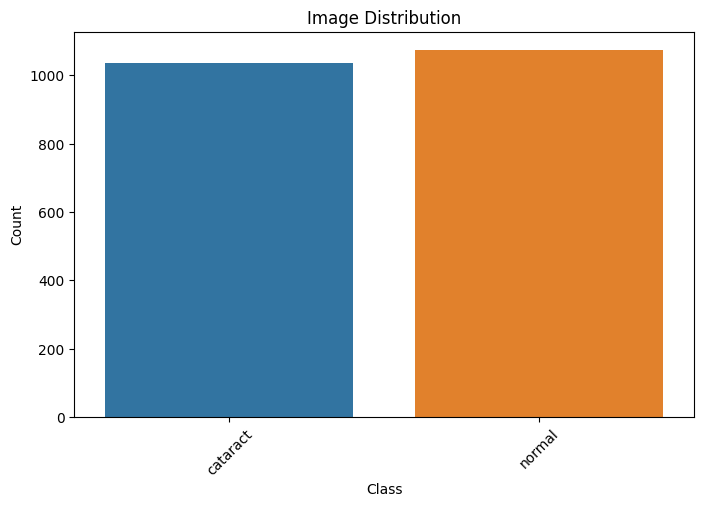

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
data_dir = "/content/drive/MyDrive/dataset"
class_labels = os.listdir(data_dir)

image_counts = []
for label in class_labels:
    class_path = os.path.join(data_dir, label)
    image_count = len(os.listdir(class_path))
    image_counts.append(image_count)

plt.figure(figsize=(8, 5))
sns.barplot(x=class_labels, y=image_counts)
plt.title('Image Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

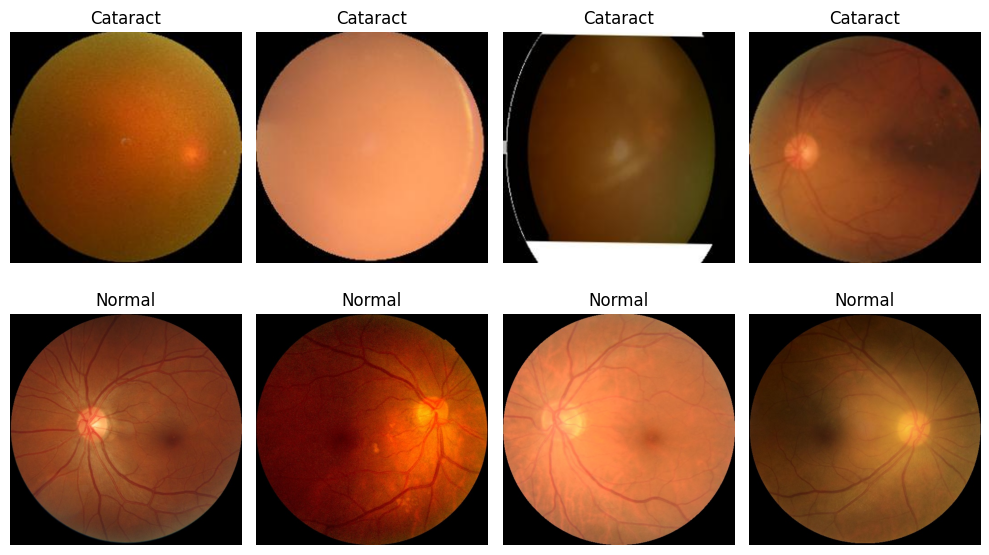

In [5]:
import matplotlib.image as mpimg
from PIL import Image
data_dir = "/content/drive/MyDrive/dataset"
cataract_dir = os.path.join(data_dir, "cataract")
normal_dir = os.path.join(data_dir, "normal")

fig, axes = plt.subplots(2, 4, figsize=(10, 6))

for i, folder in enumerate([cataract_dir, normal_dir]):
    images = os.listdir(folder)
    for j in range(4):
        img_path = os.path.join(folder, images[j])
        img = Image.open(img_path)
        img = img.resize((512, 512))
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if i == 0:
            axes[i, j].set_title("Cataract")
        else:
            axes[i, j].set_title("Normal")

plt.tight_layout()
plt.show()

In [7]:
import cv2
from skimage.feature import hog

def preprocess_and_extract_features(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (64, 64))

    features, _ = hog(resized_image, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)

    return features

# Assuming normal_image_files and cataract_image_files are defined from Step 2
X_normal = [preprocess_and_extract_features(os.path.join(normal_images_path, img)) for img in normal_image_files]
X_cataract = [preprocess_and_extract_features(os.path.join(cataract_images_path, img)) for img in cataract_image_files]

# Assuming labels are defined based on the images (0 for normal, 1 for cataract)
y_normal = [0] * len(normal_image_files)
y_cataract = [1] * len(cataract_image_files)

X = X_normal + X_cataract
y = y_normal + y_cataract


we are comparing the img with HOG features to predict the acurrte result


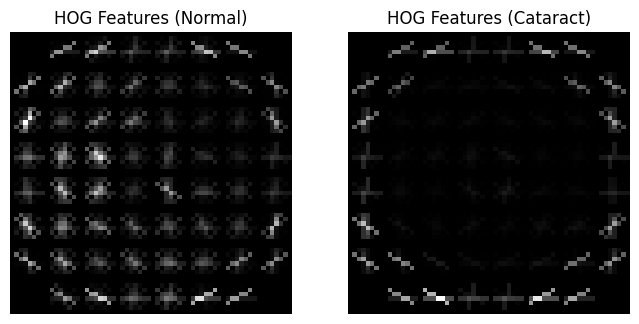

In [10]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

# Function to preprocess an image and extract HOG features
def preprocess_and_extract_features(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (64, 64))

    # Extract HOG features
    features, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True)

    return features, hog_image

# Assuming normal_image_files and cataract_image_files are defined from Step 2
normal_example_image_path = os.path.join(normal_images_path, normal_image_files[0])
cataract_example_image_path = os.path.join(cataract_images_path, cataract_image_files[0])

# Extract features and HOG image for a normal example image
normal_example_features, normal_example_hog_image = preprocess_and_extract_features(normal_example_image_path)

# Extract features and HOG image for a cataract example image
cataract_example_features, cataract_example_hog_image = preprocess_and_extract_features(cataract_example_image_path)

# Plot the HOG features for the normal example image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(normal_example_hog_image, cmap='gray')
plt.title('HOG Features (Normal)')
plt.axis('off')

# Plot the HOG features for the cataract example image
plt.subplot(1, 2, 2)
plt.imshow(cataract_example_hog_image, cmap='gray')
plt.title('HOG Features (Cataract)')
plt.axis('off')

plt.show()

# Assuming labels are defined based on the images (0 for normal, 1 for cataract)
y_normal = [0] * len(normal_image_files)
y_cataract = [1] * len(cataract_image_files)

X = X_normal + X_cataract
y = y_normal + y_cataract


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Assuming features (X) and labels (y) are obtained from Step 3
# X = ... (from Step 3)
# y = ... (from Step 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [13]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Assuming X_train, X_test, y_train, y_test are obtained from Step 4

# Train an AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Metrics for AdaBoost Model:
Accuracy: 0.9361702127659575
Precision: 0.926829268292683
Recall: 0.9405940594059405
F1 Score: 0.9336609336609337
ROC AUC Score: 0.9363603781192599

Metrics for Random Forest Model:
Accuracy: 0.9479905437352246
Precision: 0.95
Recall: 0.9405940594059405
F1 Score: 0.9452736318407959
ROC AUC Score: 0.9476725953138301


Confusion Matrix for AdaBoost Model:
[[206  15]
 [ 12 190]]

Confusion Matrix for Random Forest Model:
[[211  10]
 [ 12 190]]


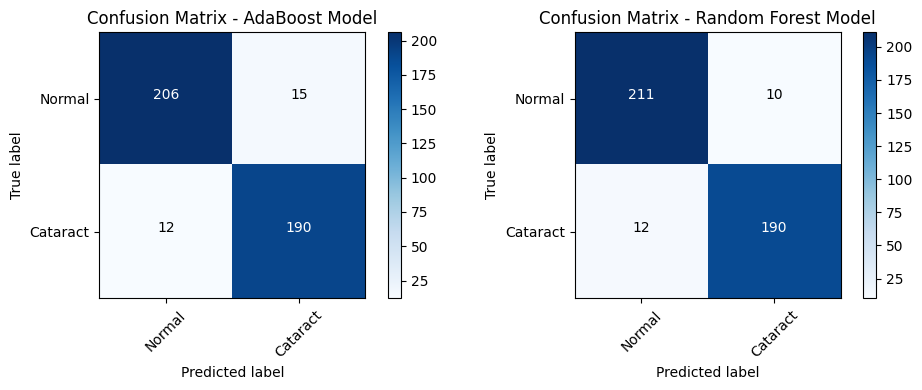

In [15]:
import numpy as np
import itertools
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Assuming adaboost_model and random_forest_model are obtained from Step 5
# Assuming X_test and y_test are obtained from Step 4

# Evaluate AdaBoost model
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

# Print the confusion matrix for AdaBoost model
print("Confusion Matrix for AdaBoost Model:")
print(adaboost_conf_matrix)

# Print the confusion matrix for Random Forest model
print("\nConfusion Matrix for Random Forest Model:")
print(random_forest_conf_matrix)

# Plot confusion matrix for AdaBoost model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_confusion_matrix(adaboost_conf_matrix, classes=['Normal', 'Cataract'], title='Confusion Matrix - AdaBoost Model')

# Plot confusion matrix for Random Forest model
plt.subplot(1, 2, 2)
plot_confusion_matrix(random_forest_conf_matrix, classes=['Normal', 'Cataract'], title='Confusion Matrix - Random Forest Model')

plt.show()


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming adaboost_model and random_forest_model are obtained from Step 5
# Assuming X_test and y_test are obtained from Step 4

# Evaluate AdaBoost model
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_precision = precision_score(y_test, adaboost_predictions)
adaboost_recall = recall_score(y_test, adaboost_predictions)
adaboost_f1 = f1_score(y_test, adaboost_predictions)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_predictions)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_predictions)
#we are Acurrecy compering with the Adaboost and RFM
# Print the evaluation metrics for both models
print("Metrics for AdaBoost Model:")
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1 Score:", adaboost_f1)
print("ROC AUC Score:", adaboost_roc_auc)

print("\nMetrics for Random Forest Model:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)
print("ROC AUC Score:", random_forest_roc_auc)




Metrics for AdaBoost Model:
Accuracy: 0.9361702127659575
Precision: 0.926829268292683
Recall: 0.9405940594059405
F1 Score: 0.9336609336609337
ROC AUC Score: 0.9363603781192599

Metrics for Random Forest Model:
Accuracy: 0.9479905437352246
Precision: 0.95
Recall: 0.9405940594059405
F1 Score: 0.9452736318407959
ROC AUC Score: 0.9476725953138301


In [17]:
# Combine the probability outputs from the four parts of each image to make a final prediction
adaboost_probabilities = adaboost_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class (Cataract)
random_forest_probabilities = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class (Cataract)

# Combine probabilities (you can choose any method suitable for your case)
# For example, you could take the average of the probabilities
combined_probabilities = (adaboost_probabilities + random_forest_probabilities) / 2

# Use the combined probabilities to determine if the image contains cataract or is normal
# For simplicity, let's say if the probability is greater than 0.5, we predict cataract (1), otherwise normal (0)
combined_predictions = np.where(combined_probabilities > 0.5, 1, 0)

# Print combined predictions
print("Combined Predictions:")
print(combined_predictions)



Combined Predictions:
[0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1]


In [18]:
import numpy as np

# Count the occurrences of 1 (cataract) and 0 (normal) in the combined_predictions array
total_cataract_predictions = np.sum(combined_predictions == 1)
total_normal_predictions = np.sum(combined_predictions == 0)

print("Total Cataract Predictions:", total_cataract_predictions)
print("Total Normal Predictions:", total_normal_predictions)


Total Cataract Predictions: 200
Total Normal Predictions: 223


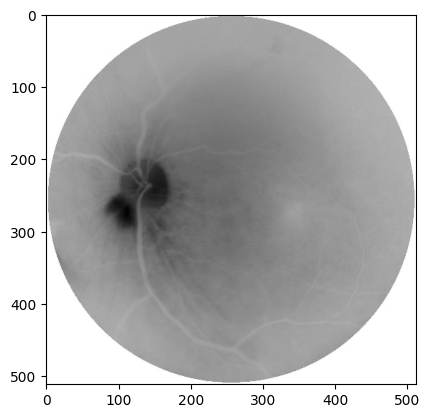

The user-provided image is predicted to contain cataract.


In [22]:
import os
import shutil
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to predict whether the user-provided image contains cataract or is normal
def predict_user_image(user_image_path):
    # Preprocess and extract features for the user-provided image (similar to Step 3)
    user_features, _ = preprocess_and_extract_features(user_image_path)

    # Predict using the trained models (AdaBoost and Random Forest)
    user_adaboost_prediction = adaboost_model.predict(user_features.reshape(1, -1))
    user_random_forest_prediction = random_forest_model.predict(user_features.reshape(1, -1))

    # Combine the predictions from both models
    # For simplicity, let's say if both models predict cataract (1), we predict cataract (1), otherwise normal (0)
    user_combined_prediction = 1 if user_adaboost_prediction == 1 and user_random_forest_prediction == 1 else 0

    return user_combined_prediction

# Assuming user_provided_image is the image provided by the user
user_provided_image = ("/content/drive/MyDrive/dataset/cataract/1994_left.jpg")#target_size==(512,512))
img = cv2.imread(user_provided_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray_r')
plt.show()
#input_arr = img_to_array(img)
#input_arr = np.array([input_arr])
# Predict whether the user-provided image contains cataract or is normal
user_prediction = predict_user_image(user_provided_image)

# Print the user's combined prediction
if user_prediction == 1:
    print("The user-provided image is predicted to contain cataract.")
else:
    print("The user-provided image is predicted to be normal.")


In [23]:
# Assuming you have the model predictions (adaboost_predictions, random_forest_predictions) and ground truth (y_test)
# Calculate evaluation metrics for AdaBoost Model
accuracy_adaboost = accuracy_score(y_test, adaboost_predictions)

# Calculate evaluation metrics for Random Forest Model
accuracy_random_forest = accuracy_score(y_test, random_forest_predictions)

# Print the evaluation metrics for both models
print("Metrics for AdaBoost Model:")
print("Accuracy:", accuracy_adaboost)

print("\nMetrics for Random Forest Model:")
print("Accuracy:", accuracy_random_forest)


Metrics for AdaBoost Model:
Accuracy: 0.9361702127659575

Metrics for Random Forest Model:
Accuracy: 0.9479905437352246


In [24]:
# Calculate accuracies for each model
accuracy_logistic = logistic_model.score(X_test, y_test)  # Assuming logistic_model is the trained model

# Compare the models based on accuracy
model_accuracies = {
    'Logistic Regression': accuracy_logistic,
    'Random Forest': accuracy_random_forest,
    'AdaBoost': accuracy_adaboost
}

# Select the model with the highest accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

# Print the accuracies for all models
print("Model Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy}")

print("\nBest Model:")
print("Name:", best_model_name)
print("Accuracy:", best_model_accuracy)


Model Accuracies:
Logistic Regression: 0.9290780141843972
Random Forest: 0.9479905437352246
AdaBoost: 0.9361702127659575

Best Model:
Name: Random Forest
Accuracy: 0.9479905437352246
